In [1]:
%matplotlib inline

import PIL.Image as Image
from io import BytesIO
import numpy as np
from unrealcv import client
import cv2
import matplotlib.pyplot as plt

In [14]:
res = client.connect()
print(res)

INFO:__init__:192:Got connection confirm: b'connected to RealisticRendering'


True


In [15]:
client.isconnected()

True

In [16]:
res = client.request('vget /unrealcv/status')
print(res)

Is Listening
Client Connected
9000
Configuration
Config file: C:/Users/cmwt-dss-swu/Downloads/RealisticRendering/WindowsNoEditor/RealisticRendering/Binaries/Win64/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



In [5]:
def color_frame(client, camera=0, rgb2bgr=False):
    res = client.request(f'vget /camera/{camera}/lit png')
    img = Image.open(BytesIO(res))
    npy = np.asarray(img)[:,:,:3]
    if rgb2bgr:
        return cv2.cvtColor(npy, cv2.COLOR_RGB2BGR)
    return npy

def depth_frame(client, camera=0, alpha=10.0, rgb2bgr=False):
    res = client.request(f'vget /camera/{camera}/depth npy')
    npy = np.load(BytesIO(res))
    npy = cv2.applyColorMap(cv2.convertScaleAbs(npy, alpha=alpha), cv2.COLORMAP_JET)
    if rgb2bgr:
        return cv2.cvtColor(npy, cv2.COLOR_RGB2BGR)
    return npy

In [32]:
color = color_frame(client)
print(color.shape)
depth = depth_frame(client, alpha=20.0)
print(depth.shape)

(480, 640, 3)
(480, 640, 3)


Text(0.5, 1.0, 'depth')

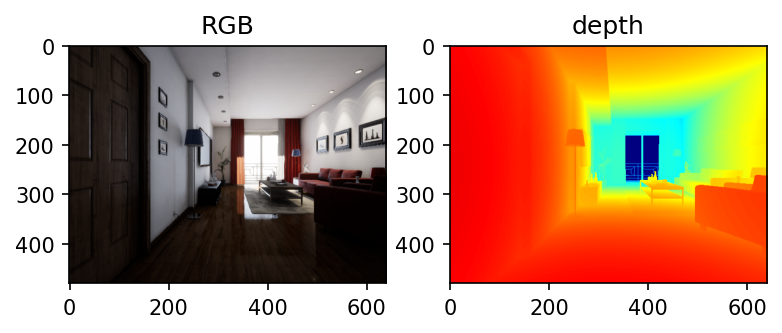

In [33]:
fig = plt.figure()
fig.set_dpi(150)

subplot = fig.add_subplot(1, 2, 1)
plt.imshow(color)
subplot.set_title('RGB')

subplot = fig.add_subplot(1, 2, 2)
plt.imshow(depth)
subplot.set_title('depth')

In [35]:
res = client.request(f'vget /camera/0/location')
print(res)
res = client.request(f'vget /camera/0/rotation')
print(res)

-106.195 437.424 96.858
0.001 -92.000 0.000


In [46]:
location = '-106.195 0.424 96.858' # x y z
rotation = '0.0 0.0 0.0' # pitch yaw roll
res = client.request(f'vset /camera/0/location {location}')
print(res)
res = client.request(f'vset /camera/0/rotation {rotation}')
print(res)

ok
ok


In [47]:
color = color_frame(client)
print(color.shape)
depth = depth_frame(client, alpha=20.0)
print(depth.shape)

(480, 640, 3)
(480, 640, 3)


Text(0.5, 1.0, 'depth')

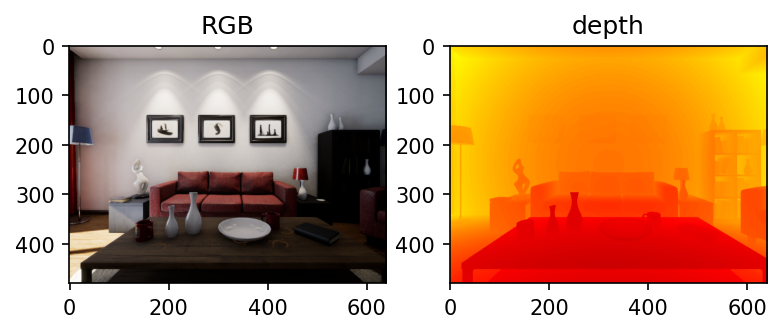

In [48]:
fig = plt.figure()
fig.set_dpi(150)

subplot = fig.add_subplot(1, 2, 1)
plt.imshow(color)
subplot.set_title('RGB')

subplot = fig.add_subplot(1, 2, 2)
plt.imshow(depth)
subplot.set_title('depth')

In [49]:
res = client.request('vget /objects')
print(res)

Carpet_5 SM_CoffeeTable_14 Couch_13 SM_Room_7 SM_Room_OuterShell_14 SM_Couch_1seat_5 Mug_22 EditorPlane_23 EditorPlane_24 EditorPlane_25 EditorPlane_26 EditorPlane_27 Mug_30 EditorPlane_31 EditorPlane_32 EditorPlane_33 EditorPlane_34 SlidingDoors_5 S_Trim_Floor_10 SM_Frame_15 SM_RoundCeilingLight_9 SM_RoundCeilingLight_10 SM_RoundCeilingLight_11 SM_RoundCeilingLight_12 SM_RoundCeilingLight_13 SM_RoundCeilingLight_14 SM_RoundCeilingLight_16 SM_RoundCeilingLight_17 SM_Railing_20 SM_Railing_21 SM_Railing_23 SM_Railing_24 SM_Railing_25 SM_Railing_26 SM_Railing_27 SM_Railing_28 SM_Railing_29 SM_Balcony_34 SM_Balcony_35 SM_Balcony_36 SM_Balcony_37 SM_Frame_38 SM_Frame_39 SM_Curtain_42 SM_Curtain_43 SM_Curtain_45 Statue_48 SM_FloorLamp_5 SM_FloorLamp_7 SM_FloorLamp_8 SM_TV_5 SM_DeskLamp_5 SM_Background_8 WallPiece1_22 WallPiece2_24 WallPiece3_26 WallPiece4_28 WallPiece5_30 WallPiece6_32 SM_Door_37 SM_Door_39 SM_Door_41 SM_Shelving_6 SM_Shelving_7 SM_Shelving_8 SM_Shelving_9 SM_Shelving_10 SM_

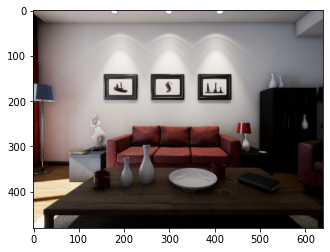

In [50]:
color = color_frame(client)
plt.imshow(color)

In [55]:
res = client.request('vget /object/Couch_13/location')
print(res)

185.00 -5.00 0.00


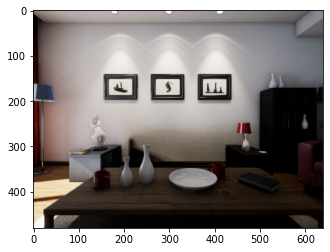

In [56]:
res = client.request('vset /object/Couch_13/hide')
color = color_frame(client)
plt.imshow(color)

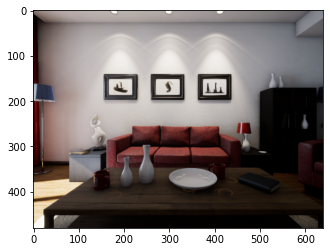

In [57]:
res = client.request('vset /object/Couch_13/show')
color = color_frame(client)
plt.imshow(color)

In [13]:
res = client.disconnect()
print(res)

None
